# Пример скупа података за пројектно учење

Идеја пројектног учења је да оно што сте научили примените на конкретан проблем и онда пустите исти тај проблем да вас још нешто научи. При томе, наравно, нико не очекује да решавање проблема буде праволинијско. Има детаља којих ћете морати да се подсетите, док ћете неке трикове "успут" морати да научите. Тражење сличних примера и решења је увек дозвољено и врло пожељно.

## Пројектни задатак – Квалитет ваздуха

Ваш пројектни задатак је да обрадите податке о квалитету ваздуха у Србији који су доступни на [Порталу отворених података](https://data.gov.rs/en/datasets/kvalitet-vazduha/). Оно што нас посебно интересује су различити параметри квалитета ваздуха прикупљени на свих доступним станицама у последњих месец дана. Јасно вам је да се ови подаци стално ажурирају због чега нема смисла да их учитавамо из унапред припремљеног фајла. Табелу са овим подацима морамо да преузмемо директно са веб сајта који објављује последње доступне податке. На овој страни имате више табела (скупова података) у различитим форматима. Осим табеле у којој су тражени подаци за последњих месеца дана ([_Kvalitet vazduha po stanicama_](http://data.sepa.gov.rs/dataset/11104dfd-b110-4b25-b350-9253e9233b6b/resource/0b6a7aa5-9b13-4a7c-8a80-f964e1c67bc3/download/air_quality_by_station.csv)) још две су нам потребне: [_Stanice za merenje kvaliteta vazduha - šifarnik_](http://data.sepa.gov.rs/dataset/11104dfd-b110-4b25-b350-9253e9233b6b/resource/dd7f4e4b-2375-4657-bb91-d541a2759891/download/station.csv) и [_Merene komponente - šifarnik_](http://data.sepa.gov.rs/dataset/11104dfd-b110-4b25-b350-9253e9233b6b/resource/7fa4ab3f-423a-4016-8508-37164b49c087/download/component.csv). Тренутно су ове табеле доступне на локацијама датим у хиперлинку. Могуће је да Портал промени локацију ових фајлова у будућности. Погледајте онда који је "_Latest URL_" за одговарајући скуп података и примените га. 

Конкретно, изаберите вама најближу станицу која прикупља тражене параметре ваздуха. Изаберите параметар или параметре које желите да анализирате и прикажете. Проверите да ли та станица стварно има податке за тражени период. Издвојте потребне податке из табеле са свим доступним подацима. Прикажите податке као временску серију (време мерења на _x_-оси, параметар на _y_-оси) и као хистограм за вредности изабраног параметра. Покушајте да протумачите резултате и видите колико често је квалитет ваздуха био одличан, добар, прихватљив, загађен или јако загађен. Ово тумачење није једноставно. Можда вам помогне текст [_CAQI, AQI, SAQI… Srbiji treba jasan pristup tumačenju zagađenosti vazduha_](https://balkangreenenergynews.com/rs/caqi-aqi-saqi-srbiji-treba-jasan-pristup-tumacenju-zagadenosti-vazduha/).

Прво увезите библиотеке за рад са табелама и цртање графикона.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

На основу URL адреса које се завршавају са CSV, јасно је да су фајлови које треба учитати управо у овом формату. Оно што се не види из адресе јесте који је сепаратор коришћен за одвајање суседних вредности. Подразумева се да је зарез тај сепаратор, али то у већини европских земаља није згодно јер се децимални бројеви пишу са зарезом. Због тога се као сепаратор често користи знак тачка-зарез. У Србији се користе обе варијанте. Који је сепаратор у ком фајлу коришћен, углавном видимо тек кад учитавање са једним од њих не успе, односно кад добијемо нераздојене вредности. У сваком случају, учитајте све три табеле помоћу функције `pd.read_csv()`.

In [2]:
stanice=pd.read_csv('https://data.gov.rs/en/datasets/r/dd7f4e4b-2375-4657-bb91-d541a2759891',sep=";")
komponente=pd.read_csv('https://data.gov.rs/en/datasets/r/7fa4ab3f-423a-4016-8508-37164b49c087',sep=";")
podaci=pd.read_csv('https://data.gov.rs/en/datasets/r/0b6a7aa5-9b13-4a7c-8a80-f964e1c67bc3',sep=",")

In [3]:
podaci.head()

,date_time,station_id,so2,pm10,o3,no2,nox,co,benzene,toluene,no,pm2_5,pm1
0,2022-06-24 00:00:00,1,10.549119,NaN,57.495900,NaN,NaN,0.178599,NaN,NaN,NaN,NaN,NaN
1,2022-06-24 00:00:00,2,8.010171,18.566102,NaN,47.382533,68.781508,0.157805,0.227148,6.058088,13.80288,12.512833,10.150000
2,2022-06-24 00:00:00,3,5.254099,NaN,51.986375,15.060899,21.328835,0.273868,NaN,NaN,4.07056,NaN,NaN
3,2022-06-24 00:00:00,4,18.783293,2.522000,NaN,6.210549,11.375379,NaN,NaN,NaN,3.36544,2.115254,1.659932
4,2022-06-24 00:00:00,5,11.628788,NaN,NaN,13.173505,23.608374,0.291652,NaN,NaN,6.82448,NaN,NaN


Примећујемо да су у колони `date_time` датум и време мерења. Судећи по првих пет редова, мерења су бележена на сваких сат времена. Да бисмо ову колону могли да користимо као континуалну независно променљиву, потребно је да буде препозната као тип `datetime`. То се вероватно није догодило. Пајтон при учитавању податка из фајла покушава да препозна тип податка који је заједнички за све елементе сваке појединачне колоне али ће целу колону оставити као објекат, односно колону стрингова уколико има икакву дилему. Проверите помоћу функције `.dtypes` који су типови податка у појединачним колонама табеле.

In [4]:
podaci.dtypes

date_time      object
station_id      int64
so2           float64
pm10          float64
o3            float64
no2           float64
nox           float64
co            float64
benzene       float64
toluene       float64
no            float64
pm2_5         float64
pm1           float64
dtype: object

Функција `.to_datetime()` ће претворити све текстуалне податке у датум и време уколико је то могуће. Урадите то за све вредности у колони `date_time`.

In [5]:
podaci.date_time=pd.to_datetime(podaci.date_time)

Подаци у табели `stanice` садржи називе станица и њихове географске локације. То су кључни подаци помоћу којих ћемо закључити која је станица најближа. Пошто имена променљивих нису иста у свим табелама потребна нам је вредност `id` из табеле `stanice` која одговара вредности `station_id` у табели `podaci`. У табели `komponente` су пуни називи и јединице мерених компененти. Ови подаци су неопходни да бисмо могли да тумачимо резултате.

In [6]:
stanice.head()

,id,k_eoi_code,k_airbase_code,k_network_id,k_local_code,k_name,k_start_date,k_stop_date,latitude,longitude,altitude,aq_stationclassification,aq_areaclassification,k_char_of_zone,k_ozone_classification,k_main_emission_source,k_city,k_city_population,k_street_name,k_report
0,1,RS1002A,RS0034A,1,0001,Kikinda Centar,2010-02-01,NaN,45.821483,20.454008,78.0,background,urban,residential,suburban,Agriculture,Kikinda,38.0,Svetosavska bb,t
1,2,RS1007A,RS0029A,1,1007,Novi Sad SPENS,2015-06-08,NaN,45.245065,19.841190,78.0,traffic,urban,residential/commercial,NaN,NaN,Novi Sad,342.0,Bulevar oslobodjenja,t
2,3,RS1008A,RS0031A,1,1008,Novi Sad Liman,2015-06-01,NaN,45.238642,19.835704,81.0,background,urban,residential,urban,NaN,Novi Sad,342.0,Narodnog fronta 45,t
3,4,RS1009A,RS0001A,1,1009,Beočin Centar,2015-07-02,NaN,45.208386,19.721709,87.0,background,urban,residential/industrial,NaN,NaN,Beočin,15.0,Kralja Petra bb,t
4,5,RS1010A,RS1010A,1,1010,Sremska Mitrovica,2015-07-02,NaN,44.972185,19.609349,82.0,traffic,urban,residential/commercial,NaN,NaN,Sremska Mitrovica,86.0,NaN,t


In [7]:
print("Najbliža stanica je", stanice['k_name'].iloc[0], "sa vrednošću id=", stanice['id'][0],".")

Najbliža stanica je Kikinda Centar sa vrednošću id= 1 .


Обратите пажњу да неименовани индекс табеле није исти као вредност променљиве која се налази у колони `id`. Да бисмо издвојили, тј. филтрирали табелу `podaci` по тој вредности треба да је препознамо у колони `station_id`.

Сад кад имате све тражене табеле и податке одговарајућег типа, треба да издвојите само оне податке који се тичу вама најближе станице. У примеру који следи узета је станица са индексом 0. Ако ваша најближа станица није "Кикинда Центар", унесите прави индекс у приступник тамо где треба.

In [8]:
podaci_najbliza=podaci.loc[podaci['station_id']==1]

Користите функцију `.head()` да проверите има ли података за тражену станицу у последњих месец дана. Ако их из било којих разлога нема, онда узмите другу најближу станицу.

In [9]:
podaci_najbliza.head()

,date_time,station_id,so2,pm10,o3,no2,nox,co,benzene,toluene,no,pm2_5,pm1
0,2022-06-24 00:00:00,1,10.549119,NaN,57.495900,NaN,NaN,0.178599,NaN,NaN,NaN,NaN,NaN
61,2022-06-24 01:00:00,1,9.001029,NaN,46.433625,NaN,NaN,0.170444,NaN,NaN,NaN,NaN,NaN
122,2022-06-24 02:00:00,1,8.604286,NaN,37.881725,NaN,NaN,0.168619,NaN,NaN,NaN,NaN,NaN
183,2022-06-24 03:00:00,1,8.970360,NaN,29.526000,NaN,NaN,0.158601,NaN,NaN,NaN,NaN,NaN
244,2022-06-24 04:00:00,1,8.687549,NaN,28.728000,NaN,NaN,0.203100,NaN,NaN,NaN,NaN,NaN


Ми ћемо, примера ради, да прикажемо измерене вредности из прве колоне са параметрима квалитета ваздуха, `so2`. Ви изаберите који желите. Иако нам је за цртање овог графика потребна само једна линија кôда, ми ћемо да би побољшали изглед графика употребити још три. Подразумевани график у Џупитеру је прилично узан због чега није погодан за дуже временске серије. Да би график покрио ширину расположивог екрана, ставићемо да су димензије графика 18 пута 6 инча. Друго, временске ознаке садрже велики број карактера па се зато преклапају ако их све хоризонтално испишемо на _x_-оси. То можемо да решимо ако ознаке исписујемо вертикално. Треће, ставићемо мрежу (_grid_) преко графика како бисмо лакше очитавали вредности.

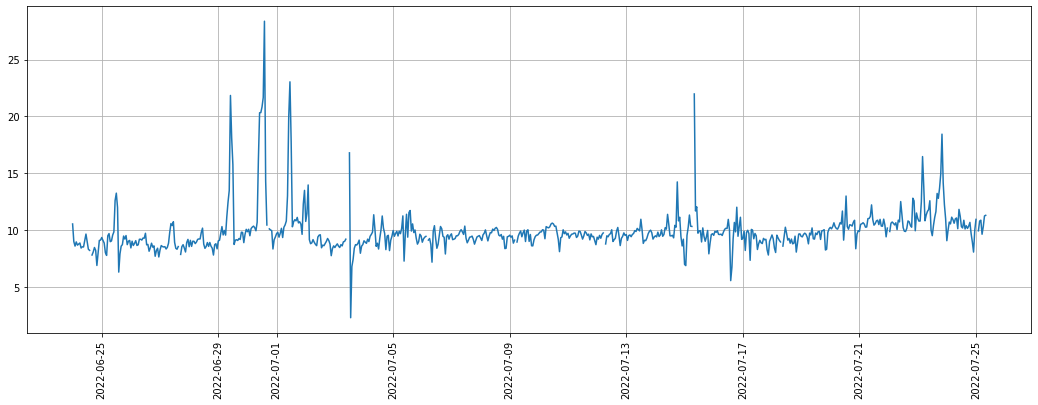

In [10]:
plt.figure(figsize=(18,6)) # dimenzije grafika
plt.plot(podaci_najbliza['date_time'],podaci_najbliza['so2'])
plt.xticks(rotation=90);   # date_time podatke ispisujemo vertikalno
plt.grid()

Исте ове податке можемо да прикажемо и хистограмом. Тада ћемо јасно видети расподелу измерених вредности, односно колико је пута очитана која вредност за месец дана. Са друге стране, изгубићемо информацију о времену када је вршено мерење. Да би график био прегледнији нагласићемо да интервал од 0 до 30 делимо на 30 делова.

<AxesSubplot:>

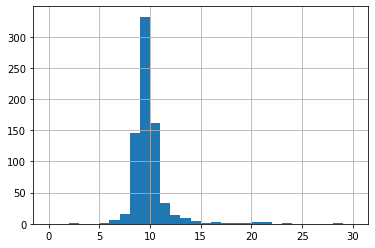

In [11]:
podaci_najbliza['so2'].hist(bins=30,range=(0,30))

Овде анализа података о квалитету ваздуха тек почиње. Тумачење ћемо препустити вама. Још боље би било да то радите тимски са професорима у школи. Из мало труда, могли бисте да на направите "контролну таблу" где би у рeалном времену били исцртавани актуелни подаци са упозорењем када је квалитет ваздуха испод прихватљивог нивоа. 